In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker

In [2]:
#define the columns to keep from the files when processing the data with pandas library
columns = ['Time /s', 'Step', 'Task', 'U /V', 'Capacity /Ah', 'Q charge /Ah', 'Q discharge /Ah', 'Efficiency (cycle) /none']

#variables to filter the data
StepCh_c2 = ['task_8']
Step_FullDch = ['task_6']
StepDch_p1 = ['task_10']
StepDch_p2 = ['task_12']
Tasks_type = ['CC', 'CC_CV']
Step_discharges = ['task_10', 'task_12']

In [3]:
#create the system path to reach all the files saved in Capacity Loss folder
data_path = Path('Capacity Loss')

#load the files in file_list list to allow access to test data
file_list = [file for file in data_path.iterdir() if file.is_file()]

for file in file_list:
    print(file) #show the files contained in file_list

Capacity Loss\20241121_CapaLoss_Cell A3_lowVolt_C.1.csv
Capacity Loss\20241127_CapaLoss_Cell A3_LowVolt_D.5.csv
Capacity Loss\20241212_CapaLoss_Cell A3_LowVolt_B.1.csv
Capacity Loss\20250108_CapaLoss_Cell A3_LowVolt_D.5.csv


In [ ]:
#Loop to process all the files from file_list
for file in file_list:
    #create dataframe df from files
    df = pd.read_csv(file, usecols = columns)
    #pre-filtering of data contained in df against tasks variable
    df_task = df[df['Task'].isin(tasks)]

    Qtot_df = df_task[(df_task['Step'] == step_tot)]
    Q1_df = df_task[(df_task['Step'] == stepCC1)]
    Q2_df = df_task[(df_task['Step'] == stepCC2)]
    Q3_df = df_task[df_task['Step'] == StepCV]

    CEff = df['Efficiency (cycle) /none'].iloc[-2]

    if CEff is not None:
        Qtot = np.max(Qtot_df['Q discharge /Ah'])*CEff
    else:
        Qtot = np.max(Qtot_df['Q discharge /Ah'])

    Q1 = np.max(Q1_df['Q discharge /Ah'])
    Q2 = np.max(Q2_df['Q discharge /Ah'])

    print(f'\033[1m{Path(file).stem}\033[0m\n' 
          f' Full capacity: {Qtot:.4f} Ah\n' 
          f' Capacity retained after storage: {Q2:.4f} Ah\n' 
          f' Capacity lost during storage (2 days): {Qtot - (Q1 + Q2):.4f} Ah\n'
          f' Coulombic efficiency: {CEff:.4f}%\n')

In [5]:
for file in file_list:
    #create dataframe df from files
    df = pd.read_csv(file, usecols = columns)
    #pre-filtering of data contained in df against tasks variable
    df_task = df[df['Task'].isin(Tasks_type)]

    QFullCh_df = df_task[df_task['Step'].isin(StepCh_c2)]
    Qdch1_df = df_task[df_task['Step'].isin(StepDch_p1)]
    Qdch2_df = df_task[df_task['Step'].isin(StepDch_p2)]

    Coul_Eff = df['Efficiency (cycle) /none'].iloc[-2]

    Q_FullCh = np.max(QFullCh_df['Q charge /Ah'])
    Qdch_part1 = np.max(Qdch1_df['Q discharge /Ah'])
    Qdch_part2 = np.max(Qdch2_df['Q discharge /Ah'])

    #process
    Theoric_Capacity_discharged = Q_FullCh * Coul_Eff
    Total_Capacity_remaining = Qdch_part1 + Qdch_part2
    Capacity_lost_after_storage = Theoric_Capacity_discharged - (Qdch_part1 + Qdch_part2)

    print(f'\033[1m{Path(file).stem}\033[0m\n'
          f' {Q_FullCh:.4f} Ah\n' 
          f' Full capacity: {Theoric_Capacity_discharged:.4f} Ah\n' 
          f' Capacity retained after storage: {Total_Capacity_remaining:.4f} Ah\n' 
          f' Capacity lost during storage (2 days): {Capacity_lost_after_storage:.4f} Ah\n'
          f' Coulombic efficiency: {100*Coul_Eff:.4f}%\n'
          f' Q1 = {Qdch_part1:.4f} Ah, Q2 = {Qdch_part2:.4f} Ah\n')

20241121_CapaLoss_Cell A3_lowVolt_C.1
 41.8380 Ah
 Full capacity: nan Ah
 Capacity retained after storage: 39.9945 Ah
 Capacity lost during storage (2 days): nan Ah
 Coulombic efficiency: nan%
 Q1 = 0.0056 Ah, Q2 = 39.9889 Ah

20241127_CapaLoss_Cell A3_LowVolt_D.5
 41.7289 Ah
 Full capacity: 41.2129 Ah
 Capacity retained after storage: 40.0258 Ah
 Capacity lost during storage (2 days): 1.1870 Ah
 Coulombic efficiency: 98.7635%
 Q1 = 0.0056 Ah, Q2 = 40.0202 Ah

20241212_CapaLoss_Cell A3_LowVolt_B.1
 41.1371 Ah
 Full capacity: 42.2809 Ah
 Capacity retained after storage: 39.8688 Ah
 Capacity lost during storage (2 days): 2.4121 Ah
 Coulombic efficiency: 102.7803%
 Q1 = 24.9817 Ah, Q2 = 14.8871 Ah

20250108_CapaLoss_Cell A3_LowVolt_D.5
 41.4346 Ah
 Full capacity: 40.9768 Ah
 Capacity retained after storage: 39.7456 Ah
 Capacity lost during storage (2 days): 1.2312 Ah
 Coulombic efficiency: 98.8950%
 Q1 = 24.9459 Ah, Q2 = 14.7997 Ah



Values of data point for Discharge_part1
 Capacity = 0.006 Ah, Cell potential = 3.35676 V
Values of data point for Discharge_part2
 Capacity = 1.237 Ah, Cell potential = 3.30341 V
Cell potential decrease upon storage = 26.674008 mV

Values of data point for Discharge_part1
 Capacity = 0.006 Ah, Cell potential = 3.36743 V
Values of data point for Discharge_part2
 Capacity = 1.237 Ah, Cell potential = 3.30397 V
Cell potential decrease upon storage = 31.727505 mV

Values of data point for Discharge_part1
 Capacity = 24.982 Ah, Cell potential = 3.24576 V
Values of data point for Discharge_part2
 Capacity = 26.213 Ah, Cell potential = 3.23846 V
Cell potential decrease upon storage = 3.648356 mV

Values of data point for Discharge_part1
 Capacity = 24.946 Ah, Cell potential = 3.24637 V
Values of data point for Discharge_part2
 Capacity = 26.177 Ah, Cell potential = 3.24011 V
Cell potential decrease upon storage = 3.125752 mV



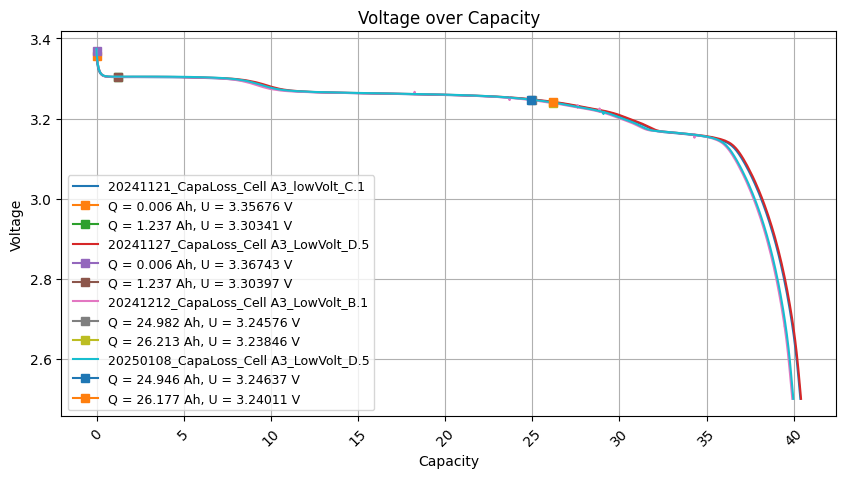

In [7]:
plt.figure(figsize=(10, 5))

for file in file_list:
    #create dataframe df from files
    df = pd.read_csv(file, usecols = columns)
    
    Voltage_df = df[(df['Task'].isin(Tasks_type)) & (df['Step'].isin(Step_FullDch))]
    Capacity_df = df[(df['Task'].isin(Tasks_type)) & (df['Step'].isin(Step_FullDch))]
    
    Voltage = Voltage_df['U /V']
    Capacity = Capacity_df['Q discharge /Ah']

    plt.plot(Capacity, Voltage, label = Path(file).stem)
    #plt.plot(Voltage, Capacity, label = Path(file).stem)

    Qdch_p1_df = df[(df['Step'].isin(StepDch_p1))]
    Capacity_Dch1 = np.max(Qdch_p1_df['Q discharge /Ah'])
    QDch_p1 = df[df['Q discharge /Ah'] == Capacity_Dch1]
    Voltage_Dch1 = QDch_p1['U /V'].values[0]

    Capacity_after_storage = Capacity_Dch1 + Capacity_lost_after_storage

    Rectified_Voltage = np.interp(Capacity_after_storage, Capacity, Voltage)

    print(f'\033[1mValues of data point for Discharge_part1\033[0m\n'
          f' Capacity = {Capacity_Dch1:.3f} Ah, Cell potential = {Voltage_Dch1:.5f} V\n'
          f'\033[1mValues of data point for Discharge_part2\033[0m\n'
          f' Capacity = {Capacity_after_storage:.3f} Ah, Cell potential = {Rectified_Voltage:.5f} V\n'
          f'\033[1mCell potential decrease upon storage = {(Voltage_Dch1 - Rectified_Voltage)*1000 /2:5f} mV\033[0m\n'
          )

    plt.plot(Capacity_Dch1, Voltage_Dch1, marker = 's', label = f'Q = {Capacity_Dch1:.3f} Ah, U = {Voltage_Dch1:.5f} V')
    plt.plot(Capacity_after_storage, Rectified_Voltage, marker = 's', label = f'Q = {Capacity_after_storage:.3f} Ah, U = {Rectified_Voltage:.5f} V')

plt.xlabel('Capacity')
plt.ylabel('Voltage')
plt.title('Voltage over Capacity')
plt.xticks(rotation=45)
plt.legend(fontsize = 9)

plt.grid()
plt.show()

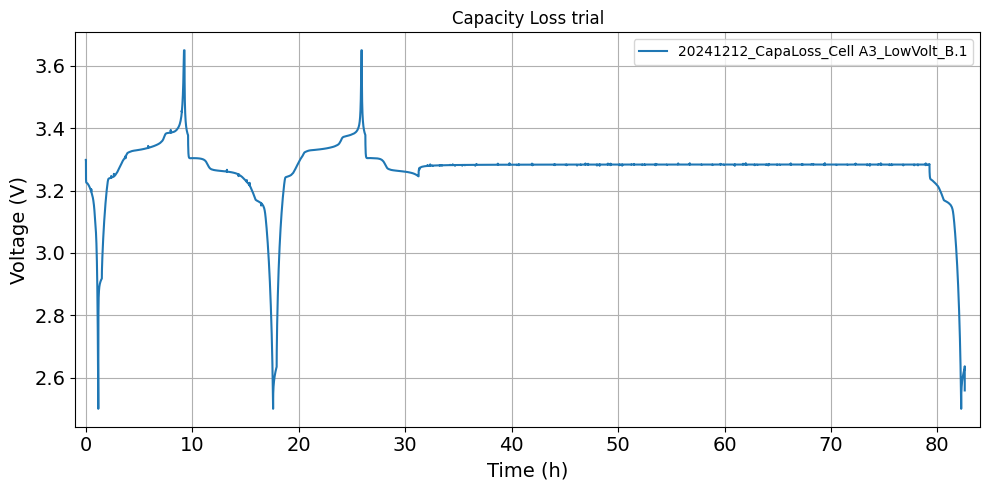

In [37]:
plt.figure(figsize = (10, 5))

file_path = 'Capacity Loss/20241212_CapaLoss_Cell A3_LowVolt_B.1.csv'
size = 14

df = pd.read_csv(file_path, usecols = columns)

Time = df['Time /s']/3600
Voltage = df['U /V']

plt.plot(Time, Voltage, label = Path(file_path).stem)

plt.xlim(-1, 84)
plt.xlabel('Time (h)', fontsize = size)
plt.ylabel('Voltage (V)', fontsize = size)
plt.title('Capacity Loss trial')
plt.xticks(fontsize = size)
plt.yticks(fontsize = size)
plt.legend(fontsize = 10)
plt.tight_layout()

plt.grid()
plt.show()

0      3.295790
1      3.295789
2      3.295793
3      3.295790
4      3.295789
         ...   
115    3.295747
116    3.295744
117    3.295744
118    3.295744
119    3.295746
Name: <Ewe/V>, Length: 120, dtype: float64


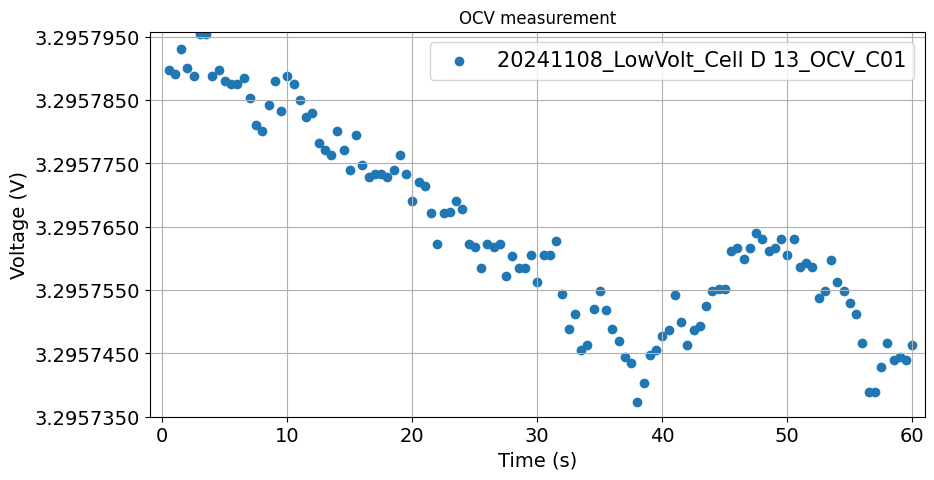

In [8]:
plt.figure(figsize = (10, 5))

file_path = '20241108_LowVolt_Cell D 13_OCV_C01.txt'
size = 14

df = pd.read_csv(file_path, sep = r'\s+')

Time = df['time/s']
Voltage = df['<Ewe/V>']
#Voltage_formatted = Voltage.apply(lambda x: round(x, 7))

print(Voltage)

plt.scatter(Time, Voltage, label = Path(file_path).stem)

def format_voltage(y, pos):
    return f"{y:.7f}"

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_voltage))

plt.xlim(-1, 61)
plt.ylim(3.2957370, 3.2957958)
plt.xlabel('Time (s)', fontsize = size)
plt.ylabel('Voltage (V)', fontsize = size)
plt.title('OCV measurement')
plt.xticks(fontsize = size)
plt.yticks(np.arange(3.295735, 3.295797, 0.00001), fontsize = size)
plt.legend(fontsize = 15)
#plt.tight_layout()

plt.grid()
plt.show()